In [1]:
!pip install  bitsandbytes
!pip install  git+https://github.com/huggingface/transformers.git
!pip install git+https://github.com/huggingface/peft.git
!pip install  git+https://github.com/huggingface/accelerate.git
!pip install  datasets scipy ipywidgets matplotlib

  Obtaining dependency information for bitsandbytes from https://files.pythonhosted.org/packages/9b/63/489ef9cd7a33c1f08f1b2be51d1b511883c5e34591aaa9873b30021cd679/bitsandbytes-0.42.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 10.6 MB/s eta 0:00:0000:0100:01
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-ye7t3db_
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-ye7t3db_
  Resolved https://github.com/huggingface/transformers.git to commit 831bc25d8fdb85768402f772cf65cc3d7872b211
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for huggingface-hub<1.0,>=0.19.3 from https://files.pythonhosted.org/packages/47/8f/cf6683de320cf3873850ba48b7383db96958fe435b8e227db92119f6d867/huggingface_hub-0.21.3-py3-none-any.whl.metadata
  Obt

In [9]:
from huggingface_hub import notebook_login
notebook_login()

In [2]:
# Huggingface repository
new_model = "Aurelius"
#replace with username
hf_model_repo="anshulsc/"+new_model

In [3]:
from datasets import load_dataset
import json

dataset_name = 'anshulsc/Aurelius_Magic_75k' # Replace with dataset link for example for this link https://huggingface.co/datasets/fka/awesome-chatgpt-prompts - fka/awesome-chatgpt-prompts
dataset = load_dataset(dataset_name, split="train")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/parquet/anshulsc--Aurelius_Magic_75k-19d53a93b0c3266d/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901. Subsequent calls will reuse this data.


In [4]:
dataset['code'][:1]

['###Instruction: You are given two arrays, A and B, each of length n. You need to perform a convolution operation on these arrays and output the resulting array.\n\nThe convolution of two arrays A and B is defined as follows:\n- Let C be the resulting array of length 2n-1, where C[i] = Σ(A[j] * B[i-j]) for j = max(0, i-n+1) to min(i, n-1).\n\nWrite a function or method to perform the convolution operation and return the resulting array C.\n\nFunction Signature: \n```cpp\nvector<int> convolution(vector<int> a, vector<int> b)\n```\n\nInput:\n- Two arrays a and b of length n (1 <= n <= 10^5), where each element of the array is an integer (-10^9 <= a[i], b[i] <= 10^9).\n\nOutput:\n- Return the resulting array C after performing the convolution operation.\n\nExample:\nInput:\na = [1, 2, 3]\nb = [4, 5, 6]\n\nOutput:\nconvolution(a, b) -> [4, 13, 28, 27, 18] \n<<code>>: ```cpp\n#include <iostream>\n#include <vector>\nusing namespace std;\n\nvector<int> convolution(vector<int> a, vector<int> 

In [5]:
# from datasets import load_dataset
# import pandas as pd


# train_dataset = load_dataset('json', data_files='/kaggle/input/records/records.json',split='train')

# # eval_dataset = load_dataset('json', data_files='/kaggle/input/records/records.json',split='train')

train_dataset = dataset

In [6]:
print(train_dataset['code'][0])

###Instruction: You are given two arrays, A and B, each of length n. You need to perform a convolution operation on these arrays and output the resulting array.

The convolution of two arrays A and B is defined as follows:
- Let C be the resulting array of length 2n-1, where C[i] = Σ(A[j] * B[i-j]) for j = max(0, i-n+1) to min(i, n-1).

Write a function or method to perform the convolution operation and return the resulting array C.

Function Signature: 
```cpp
vector<int> convolution(vector<int> a, vector<int> b)
```

Input:
- Two arrays a and b of length n (1 <= n <= 10^5), where each element of the array is an integer (-10^9 <= a[i], b[i] <= 10^9).

Output:
- Return the resulting array C after performing the convolution operation.

Example:
Input:
a = [1, 2, 3]
b = [4, 5, 6]

Output:
convolution(a, b) -> [4, 13, 28, 27, 18] 
<<code>>: ```cpp
#include <iostream>
#include <vector>
using namespace std;

vector<int> convolution(vector<int> a, vector<int> b) {
    int n = a.size();
    v

In [7]:
def formatting_func(example):
    text = f"### The following is code : {example['code']}"
    return text

In [10]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

# "meta-llama/Llama-2-7b-chat-hf"
# "mistralai/Mistral-7B-v0.1"
base_model_id = "meta-llama/Llama-2-7b-chat-hf"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(base_model_id, quantization_config=bnb_config)

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [11]:
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_side="left",
    add_eos_token=True,
    add_bos_token=True,
)
tokenizer.pad_token = tokenizer.eos_token

def generate_and_tokenize_prompt(prompt):
    return tokenizer(formatting_func(prompt))

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [12]:
tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt)
# tokenized_val_dataset = eval_dataset.map(generate_and_tokenize_prompt)

  0%|          | 0/75197 [00:00<?, ?ex/s]

75197


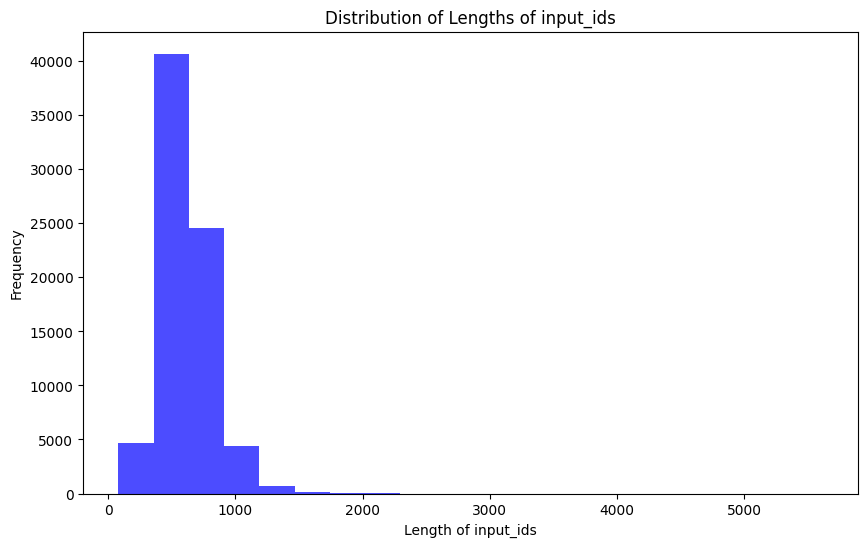

In [13]:
import matplotlib.pyplot as plt

def plot_data_lengths(tokenize_train_dataset):
    lengths = [len(x['input_ids']) for x in tokenized_train_dataset]
#     lengths += [len(x['input_ids']) for x in tokenized_val_dataset]
    print(len(lengths))

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=20, alpha=0.7, color='blue')
    plt.xlabel('Length of input_ids')
    plt.ylabel('Frequency')
    plt.title('Distribution of Lengths of input_ids')
    plt.show()

plot_data_lengths(tokenized_train_dataset)

In [14]:
max_length = 512 # This was an appropriate max length for my dataset

def generate_and_tokenize_prompt2(prompt):
    result = tokenizer(
        formatting_func(prompt),
        truncation=True,
        max_length=max_length,
        padding="max_length",
    )
    result["labels"] = result["input_ids"].copy()
    return result

In [15]:
tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt2)
# tokenized_val_dataset = eval_dataset.map(generate_and_tokenize_prompt2)

  0%|          | 0/75197 [00:00<?, ?ex/s]

In [16]:
print(tokenized_train_dataset[1]['input_ids'])
print(tokenizer.decode(tokenized_train_dataset[1]['input_ids']))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 835, 450, 1494, 338, 775, 584, 835, 3379, 4080, 29901, 887, 526, 3414, 287, 411, 16049, 263, 2560, 5132, 740, 393, 4893, 263, 1051, 310, 6031, 408, 1881, 322, 3639, 263, 716, 1051, 6943, 871, 278, 6031, 393, 526, 5112, 513, 456, 267, 29889, 319, 5112, 513, 4871, 338, 263, 1734, 29892, 16549, 29892, 1353, 29892, 470, 916, 5665, 310, 4890, 393, 13623, 278, 1021, 6375, 322, 1250, 1328, 313, 647, 8253, 8162, 29892, 6035, 22999, 362, 29892, 322, 7483, 2133, 467, 13, 13, 3492, 526, 4944, 411, 278, 1494, 775, 11534, 408, 263, 6257, 1298, 29901, 13, 13, 28956, 4691, 13, 1753, 1284, 2991

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


</s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s><s> ### The following is code : ###Instruction: You are tasked with implementing a simple Python function that takes a list of strings as input and returns a new list containing only the strings that are palindromes. A palindrome is a word, phrase, number, or other sequence of characters that reads the same forward and backward (ignoring spaces, punctuation, and capitalization).

You are provided with the following code snippet as a starting point:

75197


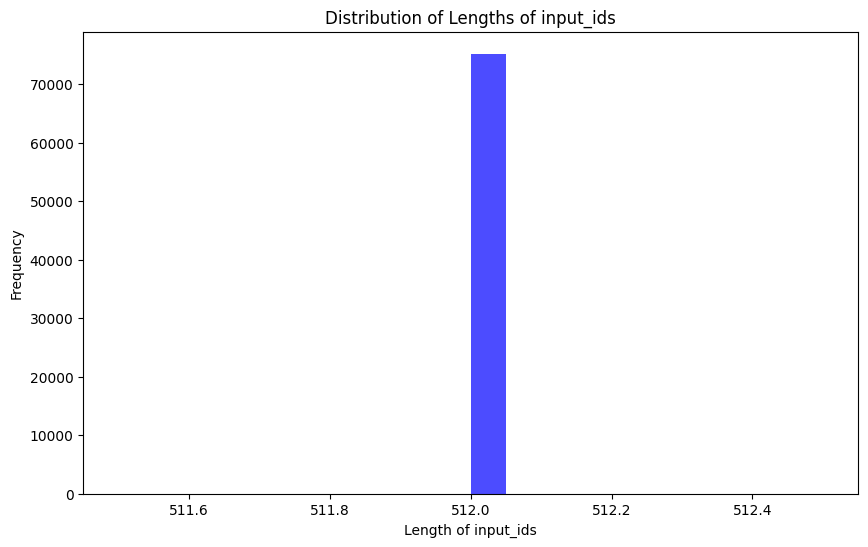

In [17]:
plot_data_lengths(tokenized_train_dataset)

In [19]:
eval_prompt = " The following is a code in python: # "

In [20]:
# Re-init the tokenizer so it doesn't add padding or eos token
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    add_bos_token=True,
)

model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

model.eval()
with torch.no_grad():
    print(tokenizer.decode(model.generate(**model_input, max_new_tokens=256, repetition_penalty=1.15)[0], skip_special_tokens=True))

 The following is a code in python: # 
 Begriffe für die Kategorie "Einzelperson" im Datenblatt von LinkedIn.
```
import pandas as pd

# Load the LinkedIn dataset
df = pd.read_csv("linkedin_data.csv")

# Extract the terms for the "Individual" category
individual_terms = df["category"] == "Individual".values

# Print the top 10 most common terms in the "Individual" category
print(individual_terms[0:10])
```
This code reads in a CSV file containing data from LinkedIn, specifically the "category" field, which contains the job title or profession of each user. The code then extracts the terms for the "Individual" category and prints the top 10 most common terms in that category.

The `pd` import line imports the pandas module, which is used to read in the CSV file and manipulate the data. The `read_csv()` function is used to load the CSV file into a Pandas DataFrame. The `df` variable is assigned this DataFrame.

The next line uses the `.values` attribute to get a numpy array of the values

In [21]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

In [22]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

In [23]:
print(model)

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear4bit(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRM

In [24]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=64,
    lora_alpha=16,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
    bias="none",
    lora_dropout=0.05,  # Conventional
    task_type="CAUSAL_LM",
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 162217984 || all params: 3662630912 || trainable%: 4.429001662944519


In [25]:
print(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(32000, 4096)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=64, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=64, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
              )
              (k_proj): lora.Linear4bit(
                (base_layer): Linear4bit(

In [26]:
if torch.cuda.device_count() > 1: # If more than 1 GPU
    model.is_parallelizable = True
    model.model_parallel = True
    
print(torch.cuda.device_count() )

2


In [27]:
!pip install -q wandb -U

import wandb, os
wandb.login()

wandb_project = "aurelius"
if len(wandb_project) > 0:
    os.environ["WANDB_PROJECT"] = wandb_project

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [28]:
tokenizer.pad_token = tokenizer.eos_token


In [30]:
import transformers
from datetime import datetime

project = "aurelius-finetune"
base_model_name = "llama"
run_name = base_model_name + "-" + project
output_dir = "./" + run_name

trainer = transformers.Trainer(
    model=model,
    train_dataset=tokenized_train_dataset,
#     eval_dataset=tokenized_val_dataset,
    args=transformers.TrainingArguments(
        output_dir=output_dir,
        warmup_steps=1,
        per_device_train_batch_size=2,
        gradient_accumulation_steps=1,
        max_steps=50,
        learning_rate=2.5e-5, # Want a small lr for finetuning
        bf16=False,
        tf32=False,
        optim="paged_adamw_8bit",
        logging_steps=25,              # When to start reporting loss
        logging_dir="./logs",        # Directory for storing logs
        save_strategy="steps",       # Save the model checkpoint every logging step
        save_steps=25,                # Save checkpoints every 50 steps
#         evaluation_strategy="steps", # Evaluate the model every logging step
#         eval_steps=25,               # Evaluate and save checkpoints every 50 steps
#         do_eval=True,                # Perform evaluation at the end of training
        report_to="wandb",           # Comment this out if you don't want to use weights & baises
        run_name=f"{run_name}-{datetime.now().strftime('%Y-%m-%d-%H-%M')}"          # Name of the W&B run (optional)
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss
25,1.226900
50,1.062600


/opt/conda/lib/python3.10/site-packages/peft/utils/save_and_load.py:139: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")


TrainOutput(global_step=50, training_loss=1.1447333908081054, metrics={'train_runtime': 2416.9284, 'train_samples_per_second': 0.083, 'train_steps_per_second': 0.021, 'total_flos': 4159218647040000.0, 'train_loss': 1.1447333908081054, 'epoch': 0.0})

In [31]:
trainer.model.push_to_hub(hf_model_repo)

/opt/conda/lib/python3.10/site-packages/peft/utils/save_and_load.py:139: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")


adapter_model.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/anshulsc/Aurelius/commit/ba7c8a0a8ab42b638d88ee0637ffe81f2725e83c', commit_message='Upload model', commit_description='', oid='ba7c8a0a8ab42b638d88ee0637ffe81f2725e83c', pr_url=None, pr_revision=None, pr_num=None)

In [36]:
from peft import AutoPeftModelForCausalLM

new_model = AutoPeftModelForCausalLM.from_pretrained(
     output_dir,
    low_cpu_mem_usage=True,
    return_dict=True,
    torch_dtype=torch.float16,
    device_map = {"" : 0}
)

# Merge LoRA and base model
merged_model = new_model.merge_and_unload()

# Save the merged model
merged_model.save_pretrained("merged_model",safe_serialization=True)
tokenizer.save_pretrained("merged_model")

ValueError: Can't find 'adapter_config.json' at './llama-aurelius-finetune'